In [1]:
import numpy as np
np.random.seed(12345)
x1 = np.random.randn(100,2)
x2 = np.random.randn(100,2) + [2,2]
x3 = np.random.randn(100,2) + [4,4]
X = np.vstack((x1,x2,x3))

In [2]:
class kmeans:
    
    def __init__(self,k=1):
        self.k = k
        
    def fit(self,X):
        n,_ = X.shape
        ## initial
        idx = np.random.choice([i for i in range(len(X))],3)
        center = X[idx,:]
        ## iteration
        dist = np.zeros((n,self.k))
        old_center = center+1
        while np.mean(np.abs(old_center-center))>1e-4:
            ## partition
            for k in range(self.k):
                dist[:,k] = np.sum((X - center[k,:])**2,1)
            label = np.argmin(dist,1)
            ## calculate center
            old_center = center
            for k in range(self.k):
                center[k,:] = np.mean(X[label==k,:],0)
        self.center = center
        self.label = label
        
        
    def predict(self,new_X):
        n,_ = new_X.shape
        dist = np.zeros((n,self.k))
        for k in range(self.k):
            dist[:,k] = np.sum((new_X - center[k,:])**2,1)
        return np.argmin(dist,1)

In [3]:
clf = kmeans(3)
clf.fit(X)

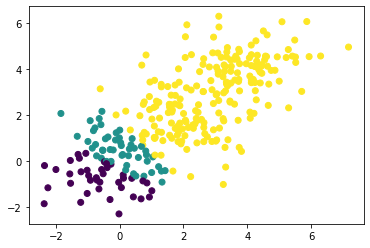

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=clf.label)